For this project, I am doing a machine learning using a data where the original source was from NBA, but the data was obtained from Kaggle via https://www.kaggle.com/datasets/sveneschlbeck/nba-players-career-duration

The aim is to build a best performing model that can be able to predict if a basketball player's NBA career duration will last at least a minimum of 5 years based on existing data of past and current players' statistics

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Firstly, I would want to read in the file containing the data I want to analyze for

In [2]:
#reading in the file
nba = pd.read_csv("nba-players.csv")

After reading in the file, I would want to take a look at the first and last few rows of the data to get a better picture of it

In [3]:
#to look at the first 15 rows of data
nba.head(15)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [4]:
#to look at the last 15 rows of data
nba.tail(15)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
1325,1325,Andre Spencer,20,21.1,9.4,3.7,8.2,44.8,0.0,0.1,...,2.7,75.9,1.9,2.2,4.1,1.2,0.8,0.3,1.3,0
1326,1326,Lloyd Daniels,77,20.4,9.1,3.7,8.4,44.3,0.8,2.3,...,1.3,72.7,1.1,1.7,2.8,1.9,0.5,0.4,1.3,1
1327,1327,Oliver Miller,56,19.1,5.6,2.2,4.6,47.5,0.0,0.1,...,1.8,71.0,1.3,3.7,4.9,2.1,0.7,1.8,1.9,1
1328,1328,Harold Miner,73,18.9,10.3,4.0,8.4,47.5,0.0,0.1,...,2.9,76.2,1.0,1.0,2.0,1.0,0.5,0.1,1.3,0
1329,1329,T.J. Warren,40,15.4,6.1,2.8,5.4,52.8,0.1,0.5,...,0.5,73.7,1.0,1.1,2.1,0.6,0.5,0.2,0.7,0
1330,1330,Adam Keefe,82,18.9,6.6,2.3,4.6,50.0,0.0,0.0,...,2.9,70.0,2.1,3.2,5.3,1.0,0.7,0.2,1.2,1
1331,1331,Lee Mayberry,82,18.3,5.2,2.1,4.6,45.6,0.5,1.3,...,0.8,57.4,0.3,1.1,1.4,3.3,0.7,0.1,1.0,1
1332,1332,Hubert Davis,50,16.3,5.4,2.2,5.0,43.8,0.1,0.4,...,1.1,79.6,0.3,0.9,1.1,1.7,0.4,0.1,0.9,1
1333,1333,Byron Houston,79,16.1,5.3,1.8,4.1,44.6,0.0,0.1,...,2.5,66.5,1.5,2.5,4.0,0.9,0.6,0.5,1.1,0
1334,1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0


Next, I want to know how large is my data, that is, to find out the number of rows and columns

In [5]:
nba.shape
#The data has 1340 rows and 22 columns altogether

(1340, 22)

Then, I would like to get a general information about my data, as in, what type of data does each column contains

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

Then, I want to find out what are the different attributes and how many attributes do I have in total

In [7]:
nba.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [8]:
len(nba.columns)

22

Up till here (based on the data seen in the first and last 15 rows), I can deduce that the "Unnamed: O" is just a column for the ID of the players and so is not needed

In [9]:
nba = nba.drop("Unnamed: 0", axis=1)
nba.head(15)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


From the output as seen above, it can be seen that the "Unnamed: 0" is successfully dropped

Next, I want to check if there is any and the quantity of duplicated rows, as well as to remove it if there is

In [10]:
duplicatedRows = nba[nba.duplicated()]
duplicatedRows
#rows to be removed are duplicatedRows whereby there are 12 rows

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1
243,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,...,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0
504,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,2.0,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1
733,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1
824,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,1.1,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0


In [11]:
nba = nba.drop_duplicates()
nba
#After removal of 12 rows, the data now has reduced from 1340 rows to 1328 rows

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


From the output above, it can be seen that there 12 duplicates which were removed, resulting in 1328 rows and 21 columns now

Next, I want to check if there is any rows with missing value

In [12]:
nba.isnull().any()

name           False
gp             False
min            False
pts            False
fgm            False
fga            False
fg             False
3p_made        False
3pa            False
3p             False
ftm            False
fta            False
ft             False
oreb           False
dreb           False
reb            False
ast            False
stl            False
blk            False
tov            False
target_5yrs    False
dtype: bool

In [13]:
nba.isna().any()

name           False
gp             False
min            False
pts            False
fgm            False
fga            False
fg             False
3p_made        False
3pa            False
3p             False
ftm            False
fta            False
ft             False
oreb           False
dreb           False
reb            False
ast            False
stl            False
blk            False
tov            False
target_5yrs    False
dtype: bool

In [14]:
print(nba.isnull().sum())

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64


From the above few outputs, can see that there are no missing or null values.
Next, I want to check specifically what are the data types for all the attributes and that the number of rows are equal for all attributes

In [15]:
nba.dtypes

name            object
gp               int64
min            float64
pts            float64
fgm            float64
fga            float64
fg             float64
3p_made        float64
3pa            float64
3p             float64
ftm            float64
fta            float64
ft             float64
oreb           float64
dreb           float64
reb            float64
ast            float64
stl            float64
blk            float64
tov            float64
target_5yrs      int64
dtype: object

In [16]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1328 non-null   object 
 1   gp           1328 non-null   int64  
 2   min          1328 non-null   float64
 3   pts          1328 non-null   float64
 4   fgm          1328 non-null   float64
 5   fga          1328 non-null   float64
 6   fg           1328 non-null   float64
 7   3p_made      1328 non-null   float64
 8   3pa          1328 non-null   float64
 9   3p           1328 non-null   float64
 10  ftm          1328 non-null   float64
 11  fta          1328 non-null   float64
 12  ft           1328 non-null   float64
 13  oreb         1328 non-null   float64
 14  dreb         1328 non-null   float64
 15  reb          1328 non-null   float64
 16  ast          1328 non-null   float64
 17  stl          1328 non-null   float64
 18  blk          1328 non-null   float64
 19  tov   

Before going deeper, I would like to check the number of counts and distribution of the target variable of "target_5yrs" to ensure it is fairly balanced and that there is no data unbalanced, so that there will be no data skewness and machine learning can work better

In [17]:
unique,counts = np.unique(nba['target_5yrs'], return_counts=True)
relation_count = dict(zip(unique,counts))
print(relation_count)

{0: 504, 1: 824}


From the output, it can be seen there are 504 players less than 5 years and 824 players more than 5 years<br>
Although it is not in the ratio of 50:50, it is fairly distributed and is appropiate for analysis and machine learning to be done
<br>
This information can also be represented by the use of bar chart for better visualisation

<AxesSubplot:>

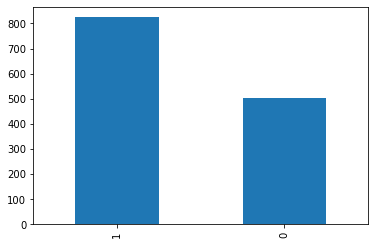

In [18]:
nba['target_5yrs'].value_counts().plot(kind='bar')
#Although not the most balanced, it did not deviate too much from it

Next, I want to take a look at the distribution for all attributes as grouped by the target variable of "target_5yrs"

target_5yrs
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

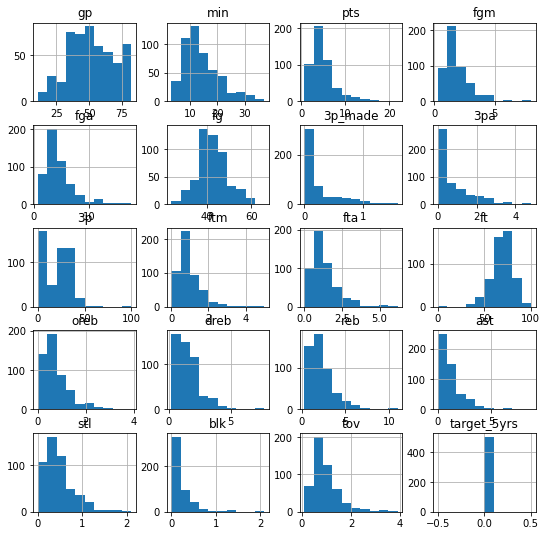

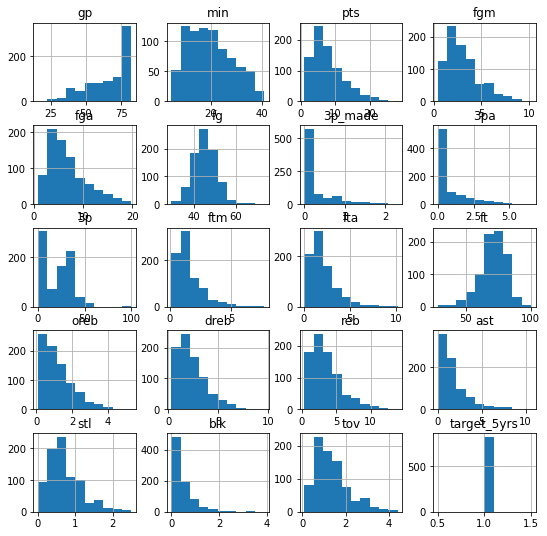

In [19]:
nba.groupby('target_5yrs').hist(figsize=(9,9))

Next, I want to explore the descriptive statistics for all numerical attributes and show up till 3 decimal place

In [20]:
nba.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000,1328.000
mean,60.411,17.634,6.804,2.630,5.886,44.185,0.248,0.779,19.177,1.298,1.822,70.325,1.010,2.028,3.036,1.551,0.619,0.369,1.194,0.620
std,17.417,8.323,4.362,1.685,3.595,6.133,0.385,1.064,16.072,0.987,1.323,10.562,0.778,1.362,2.060,1.476,0.411,0.430,0.724,0.485
min,11.000,3.100,0.700,0.300,0.800,23.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.300,0.000,0.000,0.000,0.100,0.000
25%,47.000,10.875,3.700,1.400,3.300,40.200,0.000,0.000,0.000,0.600,0.900,64.700,0.400,1.000,1.500,0.600,0.300,0.100,0.700,0.000
50%,63.000,16.100,5.550,2.100,4.800,44.100,0.100,0.300,22.200,1.000,1.500,71.250,0.800,1.700,2.500,1.100,0.500,0.200,1.000,1.000
75%,77.000,22.900,8.800,3.400,7.500,47.900,0.400,1.125,32.500,1.600,2.300,77.600,1.400,2.600,4.000,2.000,0.800,0.500,1.500,1.000
max,82.000,40.900,28.200,10.200,19.800,73.700,2.300,6.500,100.000,7.700,10.200,100.000,5.300,9.600,13.900,10.600,2.500,3.900,4.400,1.000


Thereafter, I want to investigate the correlation between all attributes

In [21]:
nba.corr()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
gp,1.000000,0.593167,0.540905,0.545494,0.520789,0.292795,0.110663,0.102513,0.040574,0.482917,0.480476,0.193224,0.402288,0.467061,0.461037,0.372731,0.453025,0.278056,0.520007,0.403239
min,0.593167,1.000000,0.911677,0.902919,0.910359,0.203449,0.392131,0.405821,0.170254,0.791051,0.779740,0.239926,0.571535,0.745238,0.709097,0.630249,0.756882,0.396958,0.826285,0.319873
pts,0.540905,0.911677,1.000000,0.990832,0.980093,0.254506,0.349710,0.360106,0.158075,0.896445,0.880907,0.258934,0.572909,0.693072,0.675566,0.553965,0.675228,0.384142,0.850336,0.316692
fgm,0.545494,0.902919,0.990832,1.000000,0.980261,0.291199,0.291823,0.302116,0.125477,0.848194,0.840668,0.223543,0.594507,0.702586,0.690016,0.534201,0.662610,0.395549,0.834326,0.318181
fga,0.520789,0.910359,0.980093,0.980261,1.000000,0.130166,0.392572,0.415887,0.203418,0.827800,0.806868,0.269749,0.502101,0.640124,0.613646,0.591678,0.690415,0.319744,0.846094,0.292736
fg,0.292795,0.203449,0.254506,0.291199,0.130166,1.000000,-0.291877,-0.347626,-0.333324,0.243288,0.297511,-0.161874,0.510577,0.408537,0.463834,-0.109304,0.056153,0.391380,0.120762,0.230963
3p_made,0.110663,0.392131,0.349710,0.291823,0.392572,-0.291877,1.000000,0.982674,0.590262,0.162216,0.099188,0.316549,-0.217944,0.018396,-0.070778,0.377226,0.308139,-0.157545,0.259140,0.037386
3pa,0.102513,0.405821,0.360106,0.302116,0.415887,-0.347626,0.982674,1.000000,0.583226,0.177923,0.112859,0.325749,-0.230754,0.013562,-0.078849,0.411242,0.340311,-0.171070,0.284726,0.018770
3p,0.040574,0.170254,0.158075,0.125477,0.203418,-0.333324,0.590262,0.583226,1.000000,0.040469,-0.022729,0.333757,-0.287738,-0.123366,-0.190810,0.267728,0.199704,-0.244984,0.113062,-0.000787
ftm,0.482917,0.791051,0.896445,0.848194,0.827800,0.243288,0.162216,0.177923,0.040469,1.000000,0.980445,0.257335,0.582206,0.652695,0.652551,0.478048,0.600088,0.403833,0.805925,0.298180


<AxesSubplot:>

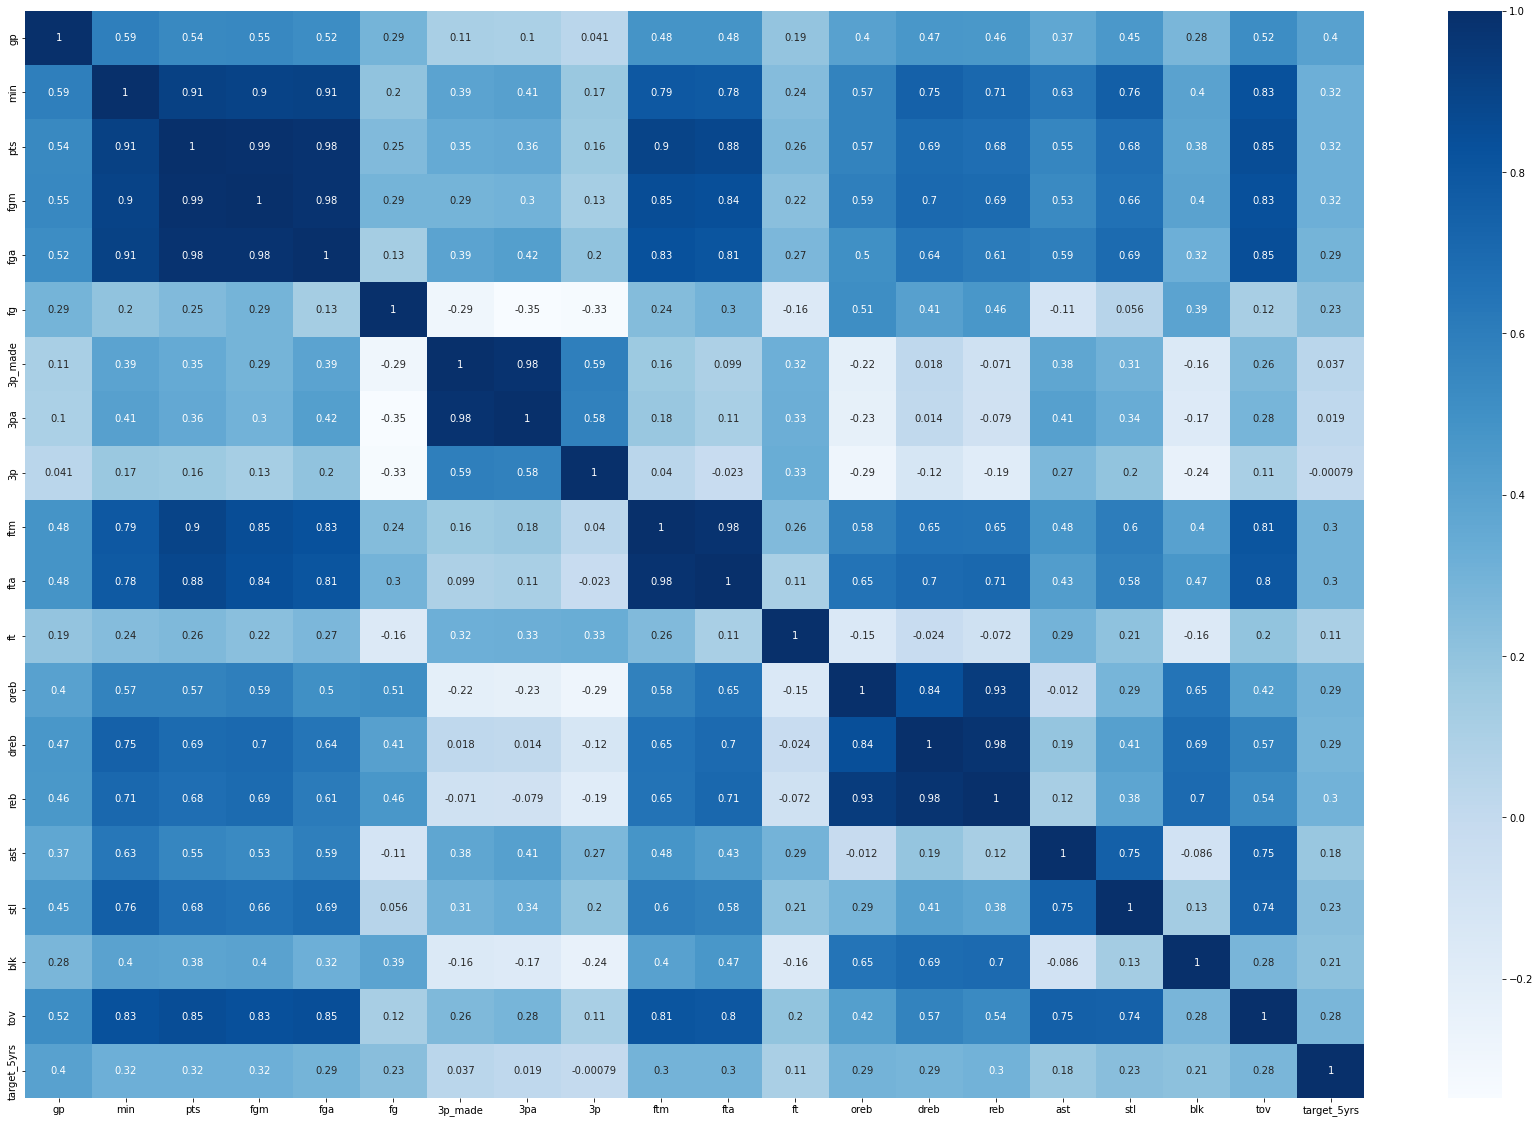

In [22]:
plt.figure(figsize=(30,20))
sns.heatmap(nba.corr(), annot=True, cmap="Blues")

From the heatmap, it can be seen that there are no attributes that were highly correlated in relation to the target variable of target_5yrs. However, certain attributes were highly correlated to one another as they are attributes which were derived from other attributes and could be removed. For example, fg which means field goals percentage, is derived from fgm which means field goals made and fga which means field goals attempt. 

The same goes for 3p which means 3 points percentage, and it is derived from 3p_made which means 3 pointer made and 3pa which means 3 pointer attempted.

The same goes for ft which means free throws percentage, and it is derived from ftm which means free throw made and fta which means free throw attempt.

With this, I will do a feature selection to only include those of percentages which are more appropiate for analysis.

oreb means offensive rebound while dreb means defensive reb and reb means total rebound. I will also remove the reb as I wants to further analyze in details for both offensive and defensive rebound

In [23]:
#Dimension Reduction by dropping off certain attributes that has no value for prediction and are redundant
nba = nba. drop(["name","fgm","fga","3p_made","3pa","ftm","fta","reb"],axis=1)
nba.head()

,gp,min,pts,fg,3p,ft,oreb,dreb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,0.7,3.4,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1


It could be seen that the attributes are now being removed

Next, I would want to rename the column name for easier intepretation

In [24]:
nba2 = nba.rename(columns={'gp': 'Games_Played', 'min': 'Minutes_Played', 'pts': 'Points_PerGame', 
                           'fg': 'Field_Goals_Conversion', '3p': '3_Points_Conversion', 'ft': 'Free_Throw_Conversion',
                          'oreb': 'Offensive_Rebound_PerGame', 'dreb': 'Defensive_Rebound_PerGame', 
                           'ast': 'Assist_Per_Game', 'stl': 'Steal_Per_Game', 'blk': 'Block_Per_Game', 
                           'tov': 'TurnOverRate_Per_Game','target_5yrs': 'More_Than_5_Years'})
nba2.head()

,Games_Played,Minutes_Played,Points_PerGame,Field_Goals_Conversion,3_Points_Conversion,Free_Throw_Conversion,Offensive_Rebound_PerGame,Defensive_Rebound_PerGame,Assist_Per_Game,Steal_Per_Game,Block_Per_Game,TurnOverRate_Per_Game,More_Than_5_Years
0,36,27.4,7.4,34.7,25.0,69.9,0.7,3.4,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1


The next cell is just to make use of box-and-whisker plot to explore and visualize the data to make sure there are no out-of-range illogical value

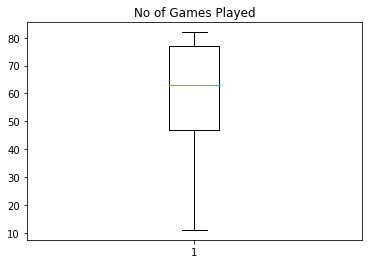

<Figure size 720x504 with 0 Axes>

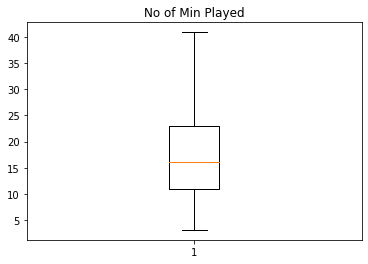

<Figure size 720x504 with 0 Axes>

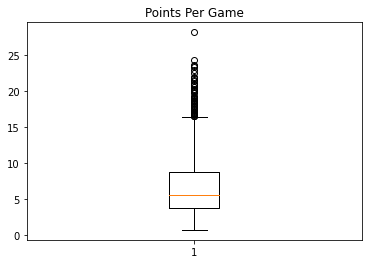

<Figure size 720x504 with 0 Axes>

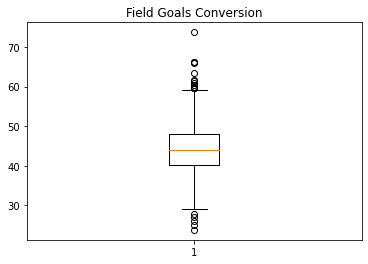

<Figure size 720x504 with 0 Axes>

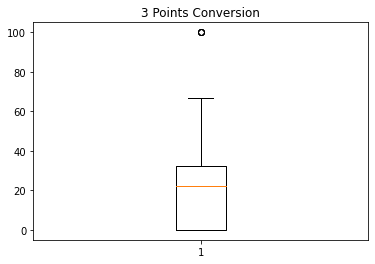

<Figure size 720x504 with 0 Axes>

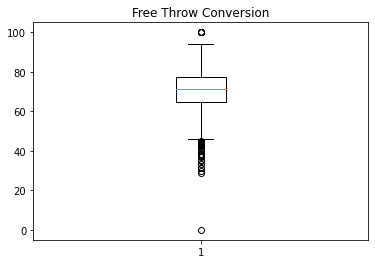

<Figure size 720x504 with 0 Axes>

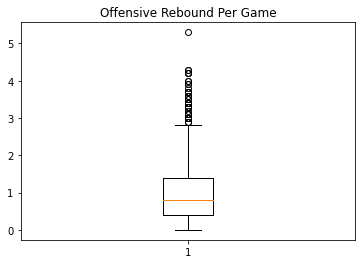

<Figure size 720x504 with 0 Axes>

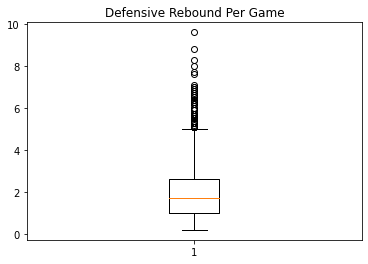

<Figure size 720x504 with 0 Axes>

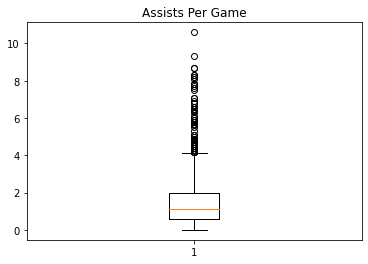

<Figure size 720x504 with 0 Axes>

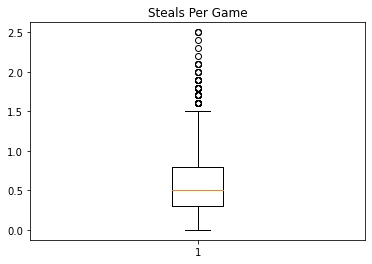

<Figure size 720x504 with 0 Axes>

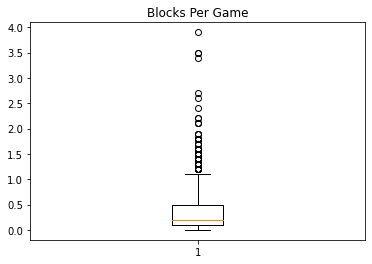

<Figure size 720x504 with 0 Axes>

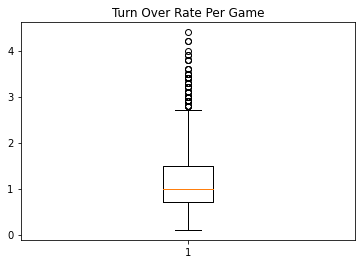

<Figure size 720x504 with 0 Axes>

In [25]:
plt.boxplot(nba2["Games_Played"])
plt.title("No of Games Played")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Minutes_Played"])
plt.title("No of Min Played")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Points_PerGame"])
plt.title("Points Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Field_Goals_Conversion"])
plt.title("Field Goals Conversion")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["3_Points_Conversion"])
plt.title("3 Points Conversion")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Free_Throw_Conversion"])
plt.title("Free Throw Conversion")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Offensive_Rebound_PerGame"])
plt.title("Offensive Rebound Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Defensive_Rebound_PerGame"])
plt.title("Defensive Rebound Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Assist_Per_Game"])
plt.title("Assists Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Steal_Per_Game"])
plt.title("Steals Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["Block_Per_Game"])
plt.title("Blocks Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

plt.boxplot(nba2["TurnOverRate_Per_Game"])
plt.title("Turn Over Rate Per Game")
fig = plt.figure(figsize =(10, 7))
plt.show()

print("\n")

Although there are outliers for a number of attributes based on box-and-whisker plot, it means that there are varying results between different players. As those values are not impossible to have and so are not illogical data as those results are achievable.

Before going into machine learning, I would like to further analyze for the points among different players

<AxesSubplot:ylabel='Frequency'>

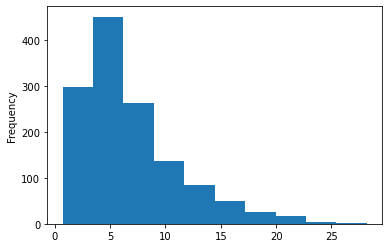

In [26]:
nba2['Points_PerGame'].plot.hist()

Based on the output, it can be seen that most players average 5 points per game

**Pre-Processing for Machine Learning**


In [27]:
#split the data into the input variables as represented by x, and output variable as represented by y
x = nba2.drop('More_Than_5_Years', axis=1)
y = nba2[['More_Than_5_Years']]
print(x.head())
print("\n\n")
print(y.head())
print()
print(x.shape)
print(y.shape)

   Games_Played  Minutes_Played  Points_PerGame  Field_Goals_Conversion  \
0            36            27.4             7.4                    34.7   
1            35            26.9             7.2                    29.6   
2            74            15.3             5.2                    42.2   
3            58            11.6             5.7                    42.6   
4            48            11.5             4.5                    52.4   

   3_Points_Conversion  Free_Throw_Conversion  Offensive_Rebound_PerGame  \
0                 25.0                   69.9                        0.7   
1                 23.5                   76.5                        0.5   
2                 24.4                   67.0                        0.5   
3                 22.6                   68.9                        1.0   
4                  0.0                   67.4                        1.0   

   Defensive_Rebound_PerGame  Assist_Per_Game  Steal_Per_Game  Block_Per_Game  \
0          

Next, I would want to import the various models and create a list of models for the machine learning

In [28]:
#importing Training Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

Then, I would also need to import the training and testing of data split, cross validation score and accuracy score

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Thereafter, I split the data into training and testing partition in the ratio of 70:30. Random state is also utilised to ensure that the result should be always the same whenever we run it

In [31]:
# Split the training and testing data in the ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3,
    stratify = nba2.More_Than_5_Years, random_state=123)

In [32]:
print(y_train.count())
print(y_test.count())

More_Than_5_Years    929
dtype: int64
More_Than_5_Years    399
dtype: int64


In [33]:
print(x_test)

      Games_Played  Minutes_Played  Points_PerGame  Field_Goals_Conversion  \
977             35            13.9             4.8                    43.4   
442             70            36.2            23.7                    52.3   
1169            65            16.4             5.9                    46.2   
144             81            13.8             6.5                    47.9   
454             82            19.4             9.3                    48.7   
...            ...             ...             ...                     ...   
1307            47             4.7             1.9                    48.6   
620             30            25.7             5.8                    40.0   
267             44             7.6             1.1                    38.5   
135             69            19.6             6.3                    41.1   
294             66            14.2             4.4                    47.1   

      3_Points_Conversion  Free_Throw_Conversion  Offensive_Reb

Based on the above few outputs, I am aware of the number of rows I have used for training (929) and testing (399), and I have ensured that the data to be trained are correct

**Implementation of Machine Learning for various Models**

Firstly, I will perform the simple validation by performing for loop

Simple Validation

In [34]:
names = []
scores = []

for name, model in models:
    model.fit(x_train,y_train)  
    y_pred = model.predict(x_test) 
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
models_comparison = pd.DataFrame({'Name': names, 'Score': scores})
models_comparison.sort_values(by='Score', ascending=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

,Name,Score
2,LR,0.724311
6,GB,0.689223
0,KNN,0.664160
5,RF,0.659148
4,GNB,0.656642
3,DT,0.624060
1,SVM,0.609023


Based on the output, for simple validation, logistic regression is the best performing and it could be seen clearly as I have sort the mdoels in descending order based on their score.

For further exploration on machine learning, I can also do with another approach of proceeding with cross validation to see if there will be any difference

To achieve that, K-Fold function will have to be imported before performing the for loop. n_split is to split the data 10 times for training while .mean() is to take the average accuracy of the 10 runs

**Cross-Validation**

In [35]:
from sklearn.model_selection import KFold

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123, shuffle=True) 
    score = cross_val_score(model, x, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
kf_cross_val.sort_values(by='Score', ascending=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

,Name,Score
2,LR,0.715334
6,GB,0.708573
0,KNN,0.672465
5,RF,0.668672
4,GNB,0.643091
3,DT,0.618267
1,SVM,0.603890


While the score did change slightly, Logistic Regression remains the best performing model. This is not unexpected as logistic regression is a binary classfication white-box model that can account for the individual features effect on the output variable

With that, next, I will be doing feature selection for Logistic Regression

Feature selection will test out for the features by dropping off the features one by one in a run in order to find out which is the more important features and eventually come up with a final number of features that it deemed is important. cv=10 will means it split into 10 partitions

Next, I will be doing a for-loop to find out which are the attributes that were deemed as important

The == True in the for loop is to generate out the list of features that it found out it was important in their run

In [39]:
from sklearn.feature_selection import RFECV
lr_model = LogisticRegression()
rfecv = RFECV(estimator=lr_model, step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [40]:
features = nba2.columns[:-1]

feature_importance = list(zip(features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Games_Played', 'Minutes_Played', 'Points_PerGame', 'Offensive_Rebound_PerGame', 'Defensive_Rebound_PerGame', 'Assist_Per_Game', 'Steal_Per_Game', 'Block_Per_Game', 'TurnOverRate_Per_Game']


Based on the output of new_features, it can be seen that 3 points conversion and free throw conversion is not inside this new_features so they are not the important features and that there are 10 features now, which tally with the outcome of the plot above

Next, calculate the accuracy score for before and after feature selection, but taking the average accuracy score of the 10 runs as represented by cv=10

In [41]:
# Calculate accuracy scores 
x_new = nba2[new_features]
initial_score = cross_val_score(lr_model, x, y, cv=10, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(lr_model, x_new, y, cv=10, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Initial accuracy : 0.6949988607883345 
Accuracy after Feature Selection : 0.7032809295967191 


The result has showed that the best performing model for this analysis and data provided is logistic regression with a score of 0.724311 when doing simple validation without cross validation. 

Although result changed slightly, logistic regression still remains the best performing model for this analysis with a score of 0.715334 when cross validation, which is usually more preferred, is done

When feature selection is performed with the use of cross-validation, as compared to the initial average accuracy of 0.6949988607883345 (Based on 10 splits), there is an increased in the average accuracy after feature selection, which increased the average accuracy to 0.7032809295967191 (Based on 10 splits).

In conclusion, models to predict if a NBA player's career can last over 5 years were built, with the best performing model being logistic regression having an approximate accuracy of 70.0%